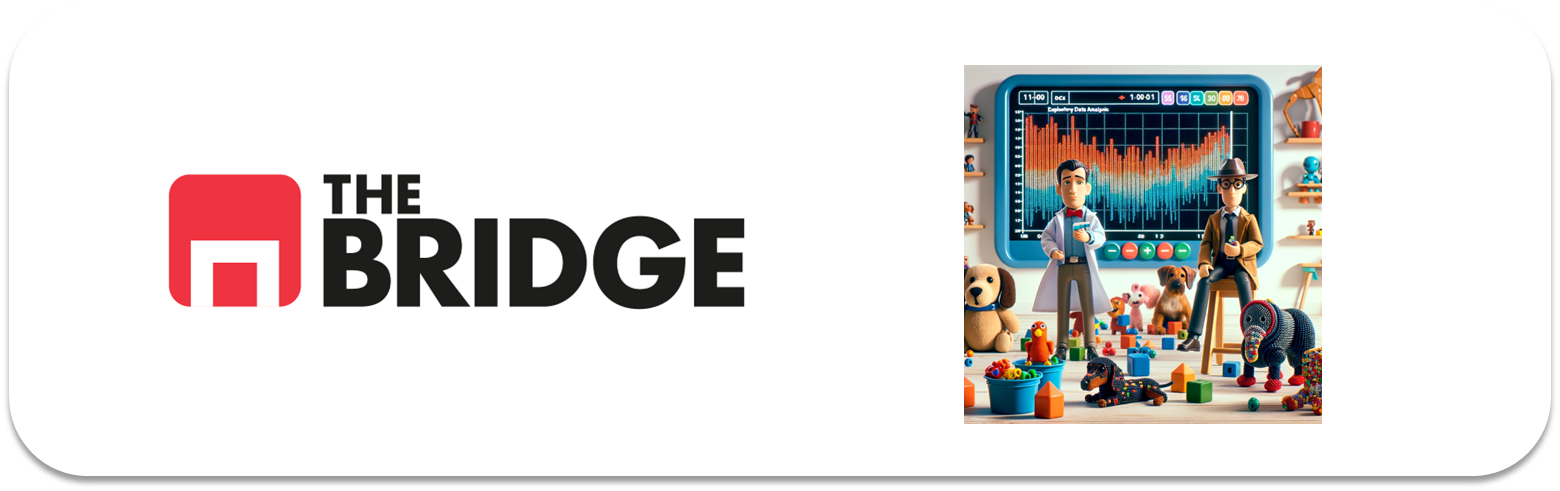

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import pearsonr

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df.drop(["deck", "survived", "pclass", "embarked"], axis=1, inplace=True)

In [4]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df["family_members"] = df["parch"] + df["sibsp"]
df.drop(["parch", "sibsp"], axis=1, inplace=True)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df["embark_town"].isna().sum()

C:\Users\rafae\AppData\Local\Temp\ipykernel_61040\4153734063.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)


np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
# Reemplazo el valor por who en age:
es_woman = df.who == 'woman'
es_child = df.who == 'child'
es_man = df.who == 'man'

media_woman = df.loc[es_woman, 'age'].mean()
media_child = df.loc[es_child, 'age'].mean()
media_man = df.loc[es_man, 'age'].mean()

es_age_nulo = df.age.isna()

df.loc[es_woman & es_age_nulo, 'age'] = media_woman
df.loc[es_child & es_age_nulo, 'age'] = media_child
df.loc[es_man & es_age_nulo, 'age'] = media_man

df["age"].isna().sum()

np.int64(0)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

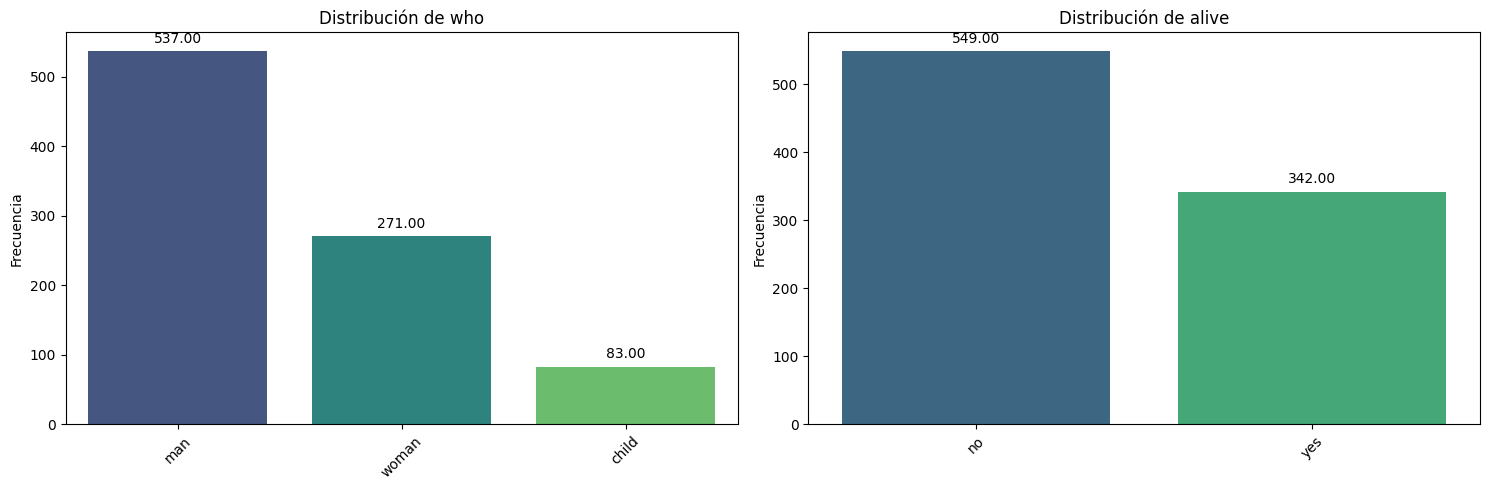

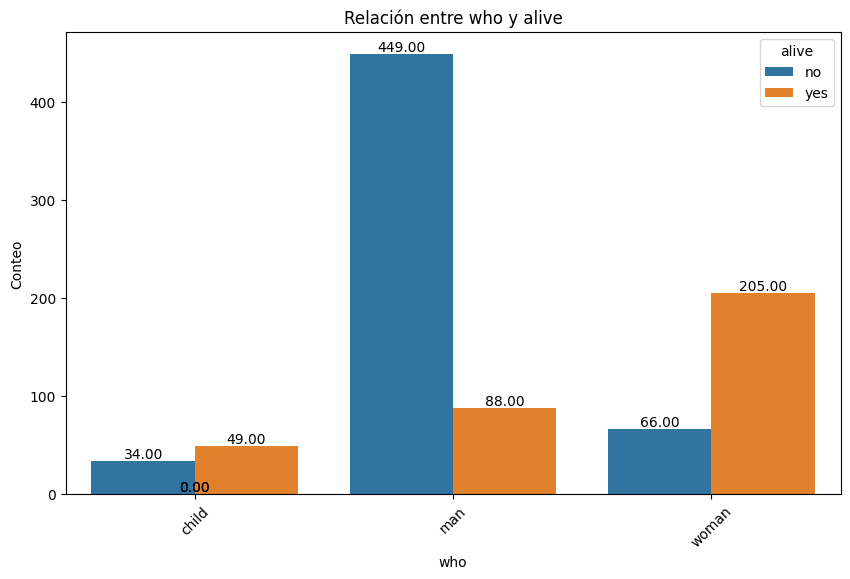

En terminos absolutos, sobrevivieron mas mujeres: 
- mujeres: 205 
- hombres: 88 
- children: 49


In [8]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños?
pinta_distribucion_categoricas(df, ['who', 'alive'], mostrar_valores=True)

plot_categorical_relationship_fin(df, 'who', 'alive', show_values=True)

df.groupby('who')['alive'].value_counts()

print("En terminos absolutos, sobrevivieron mas mujeres: \
\n- mujeres: 205 \
\n- hombres: 88 \
\n- children: 49")

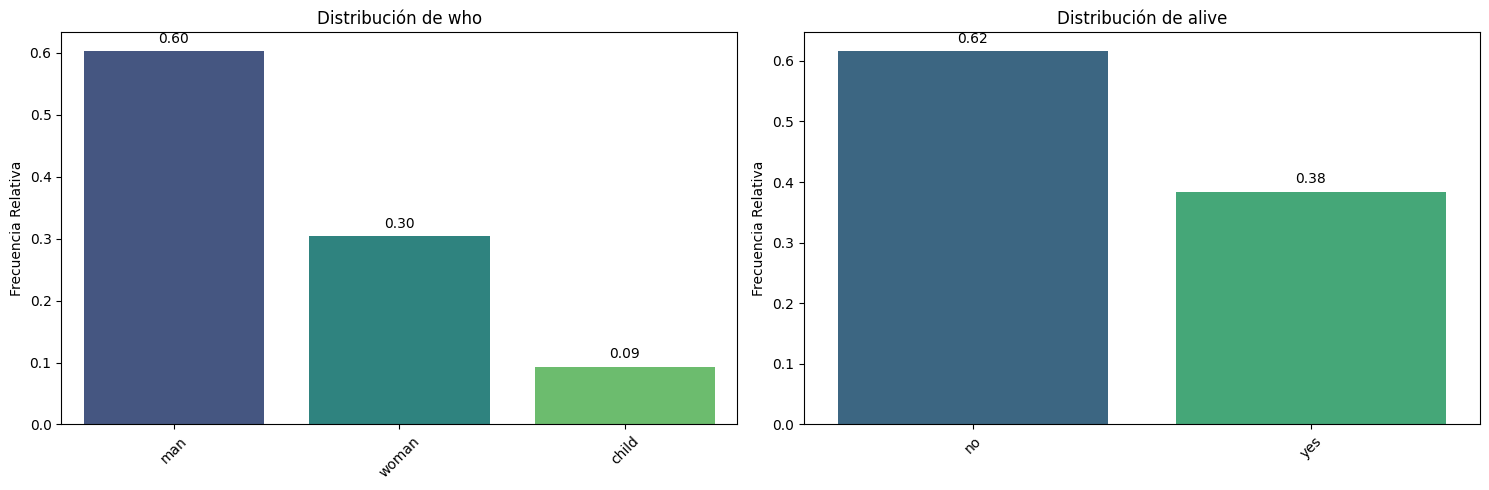

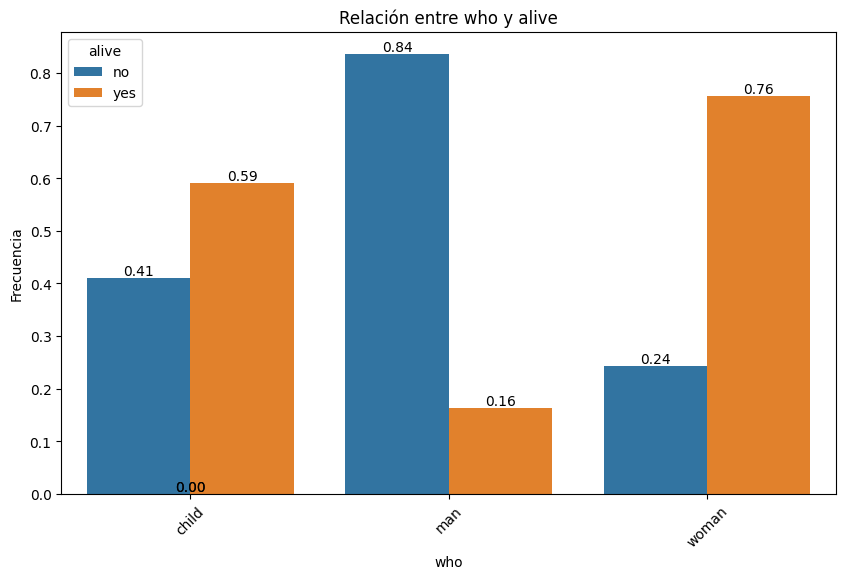

En terminos relativos, sobrevivieron mas mujeres: 
- mujeres: 76% 
- hombres: 16% 
- children: 59%


In [9]:
# En términos relativos, ¿sobrevivieron más hombres, mujeres o niños?

pinta_distribucion_categoricas(df, ['who', 'alive'], mostrar_valores=True, relativa=True)

plot_categorical_relationship_fin(df, 'who', 'alive', show_values=True, relative_freq=True)

round(df.groupby('who')['alive'].value_counts(normalize=True)*100, 2)

print("En terminos relativos, sobrevivieron mas mujeres: \
\n- mujeres: 76% \
\n- hombres: 16% \
\n- children: 59%")

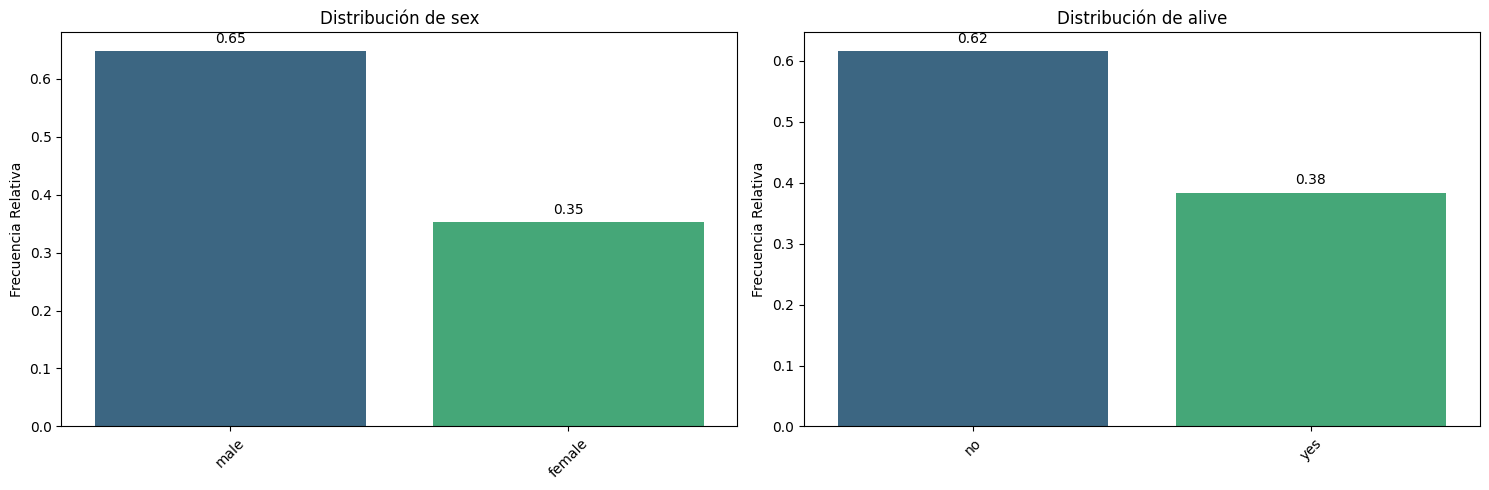

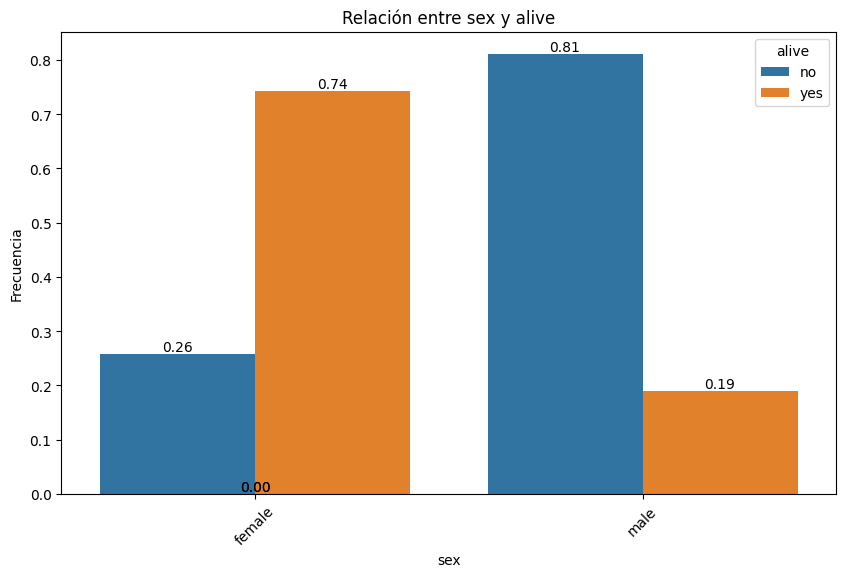

sex     alive
female  yes      74.0
        no       26.0
male    no       81.0
        yes      19.0
Name: proportion, dtype: float64

In [10]:
# ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?

pinta_distribucion_categoricas(df, ['sex', 'alive'], relativa=True, mostrar_valores=True)
plot_categorical_relationship_fin(df, 'sex', 'alive', relative_freq=True, show_values=True)
round(df.groupby('sex')['alive'].value_counts(normalize=True) *100)

In [11]:
contingency_table = pd.crosstab(df['alive'], df['sex'])
chi2_stat, p_val, dof, exp = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Estadisticamente hay una diferencia significativa en la supervivencia de hombres y mujeres.")
else:
    print("Estadisticamente NO hay una diferencia significativa en la supervivencia de hombres y mujeres.")

print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table:\n {exp}")

Chi-Squared Value: 260.71702016732104
P-Value: 1.1973570627755645e-58
Estadisticamente hay una diferencia significativa en la supervivencia de hombres y mujeres.
Degrees of freedom: 1
Expected frequencies table:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [12]:
# ¿Y entre ser adulto o ser niño?



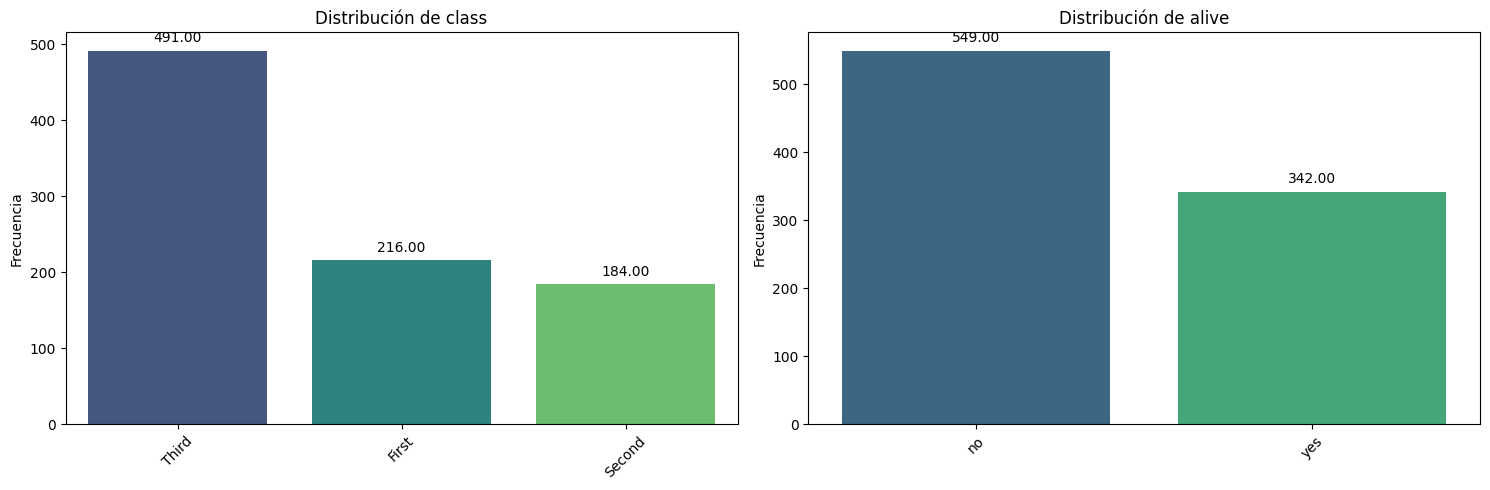

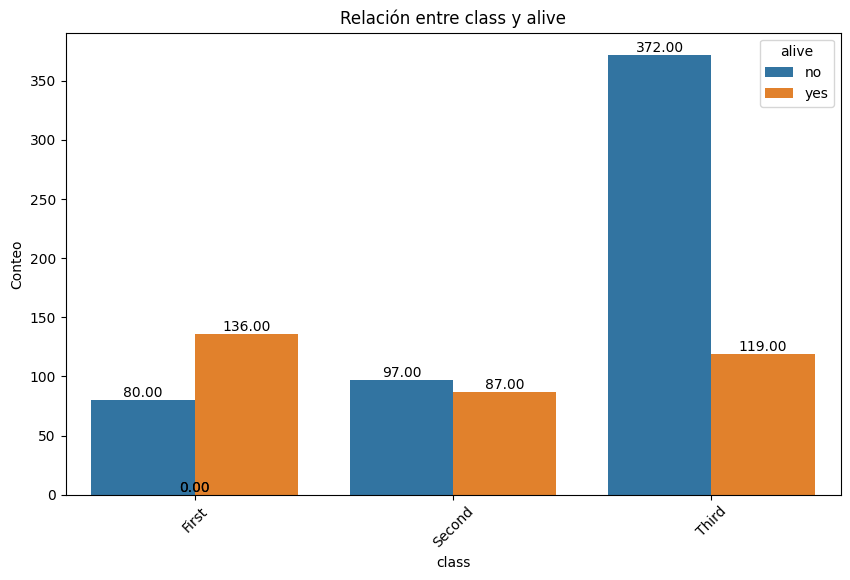

class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

In [13]:
# 2. En términos absolutos: ¿de que clase sobrevivieron más pasajeros?

pinta_distribucion_categoricas(df, ['class', 'alive'], mostrar_valores=True)

plot_categorical_relationship_fin(df, 'class', 'alive',show_values=True)

df.groupby('class')['alive'].value_counts()

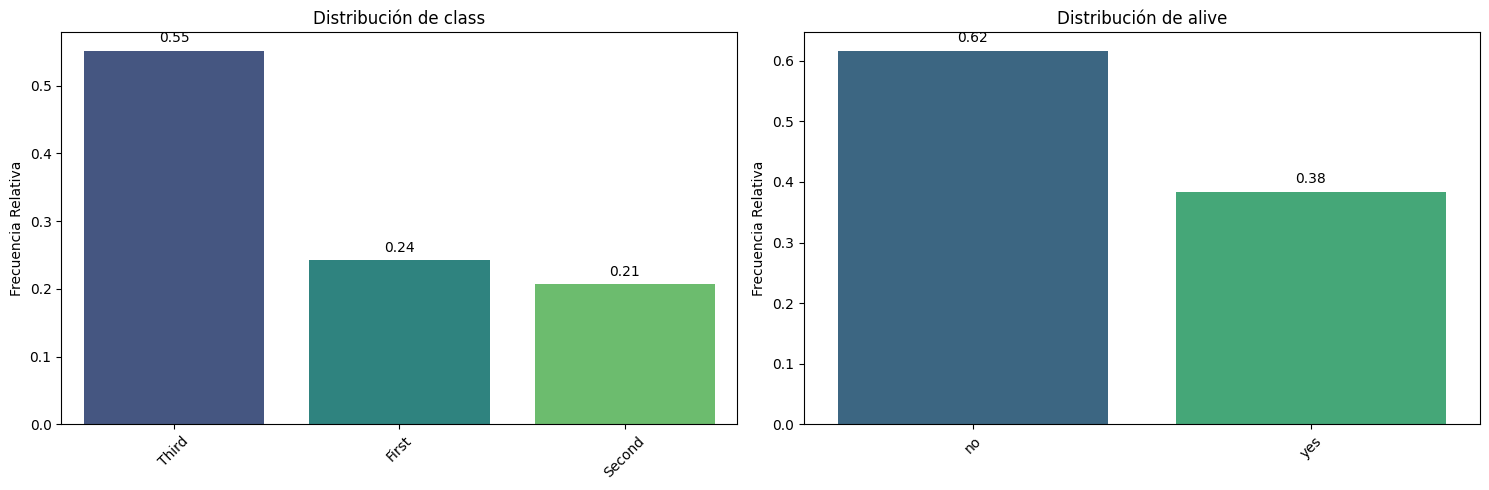

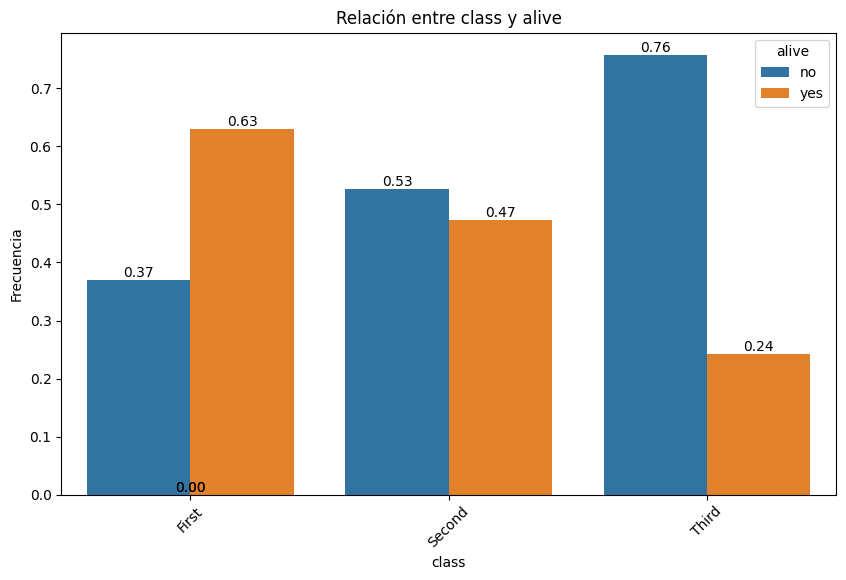

Tanto en terminos Absolutos como Relativos, se puede observar una mayor supervivencia de los pasajeros       
de la primera clase sobre los de segunda y por ultimo los de tercera clase. 1ra > 2da > 3ra.


In [14]:
# Y en terminos relativos? 

pinta_distribucion_categoricas(df, ['class', 'alive'], mostrar_valores=True, relativa=True)

plot_categorical_relationship_fin(df, 'class', 'alive',show_values=True, relative_freq=True)

round(df.groupby('class')['alive'].value_counts(normalize=True) *100,2)

print("Tanto en terminos Absolutos como Relativos, se puede observar una mayor supervivencia de los pasajeros \
      \nde la primera clase sobre los de segunda y por ultimo los de tercera clase. 1ra > 2da > 3ra.")

In [15]:
# ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
contingency_table = pd.crosstab(df['alive'], df['class'])
chi2_stat, p_val, dof, exp = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Estadisticamente hay una diferencia significativa en la supervivencia segun las clases.")
else:
    print("Estadisticamente NO hay una diferencia significativa en la supervivencia segun las clases.")

print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table:\n {exp}")

Chi-Squared Value: 102.88898875696056
P-Value: 4.549251711298793e-23
Estadisticamente hay una diferencia significativa en la supervivencia segun las clases.
Degrees of freedom: 2
Expected frequencies table:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


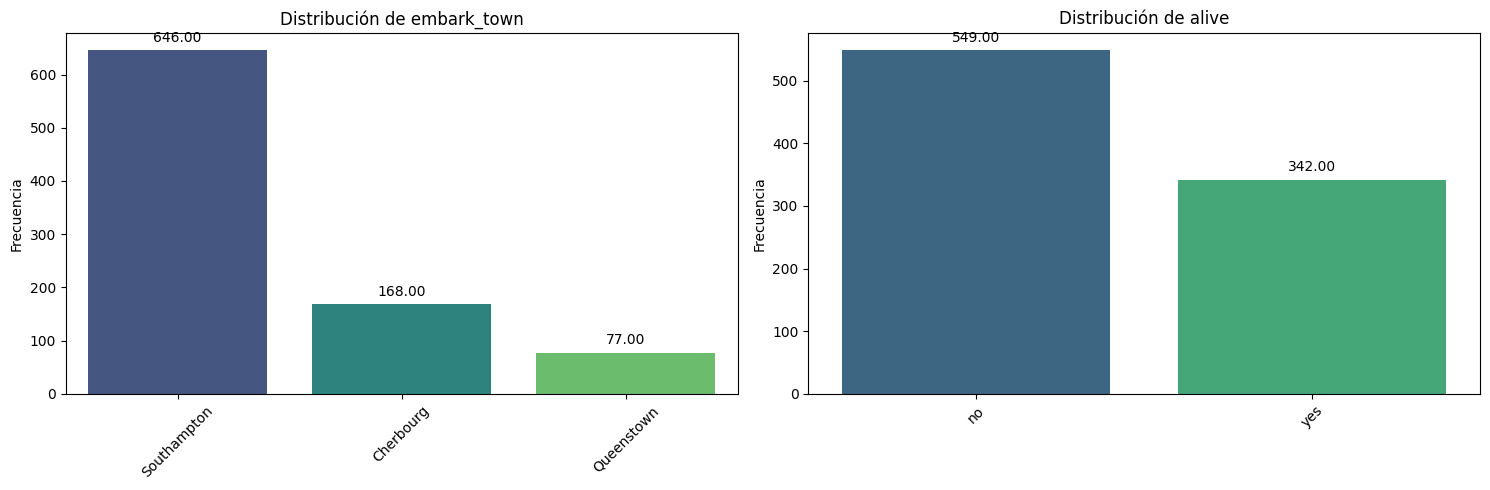

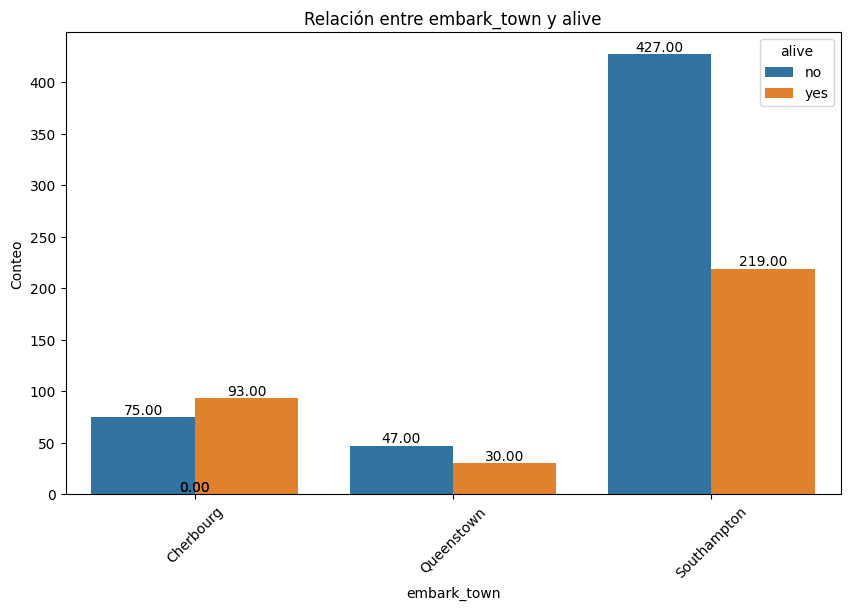

En terminos Absolutos la mayor cantidad de sobrevivientes fueron los pasajeros que abordaron en la ciudad de Southampton


In [16]:
# 3. ¿De qué ciudad sobrevivieron más personas?

pinta_distribucion_categoricas(df, ['embark_town', 'alive'], mostrar_valores=True)

plot_categorical_relationship_fin(df, 'embark_town', 'alive', show_values=True)

df.groupby('embark_town')['alive'].value_counts()

print("En terminos Absolutos la mayor cantidad de sobrevivientes fueron los pasajeros que abordaron en la ciudad de Southampton")

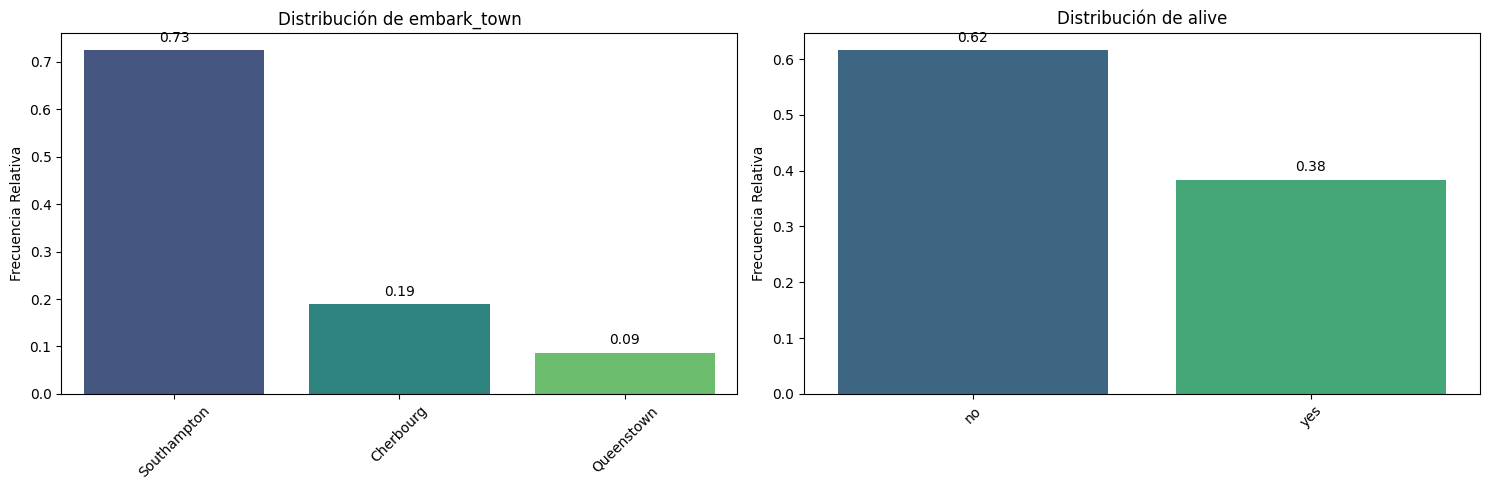

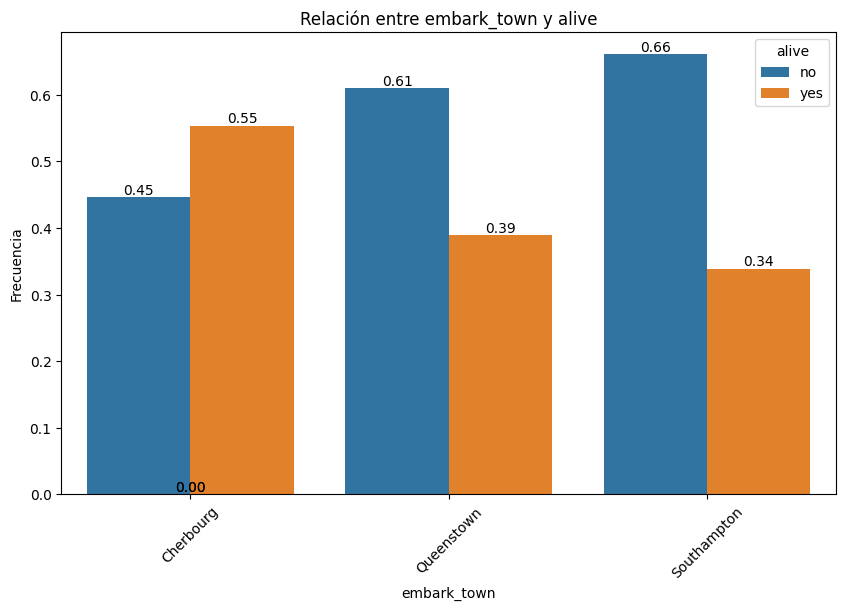

En terminos Relativos la mayor cantidad de sobrevivientes fueron los pasajeros que abordaron en la ciudad de Cherbourg


In [17]:
# ¿Porcentualmente de que ciudad sobrevivieron más personas?

pinta_distribucion_categoricas(df, ['embark_town', 'alive'], mostrar_valores=True, relativa=True)

plot_categorical_relationship_fin(df, 'embark_town', 'alive', show_values=True, relative_freq=True)

round(df.groupby('embark_town')['alive'].value_counts(normalize=True)*100,2)

print("En terminos Relativos la mayor cantidad de sobrevivientes fueron los pasajeros que abordaron en la ciudad de Cherbourg")

In [18]:
# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

contingency_table = pd.crosstab(df['embark_town'], df['alive'])
chi2_stat, p_val, dof, exp = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Estadisticamente hay una diferencia significativa en la supervivencia segun la ciudad de embarcación.")
else:
    print("Estadisticamente NO hay una diferencia significativa en la supervivencia segun la ciudad de embarcación.")

print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table:\n {exp}")

Chi-Squared Value: 25.964452881874784
P-Value: 2.3008626481449577e-06
Estadisticamente hay una diferencia significativa en la supervivencia segun la ciudad de embarcación.
Degrees of freedom: 2
Expected frequencies table:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


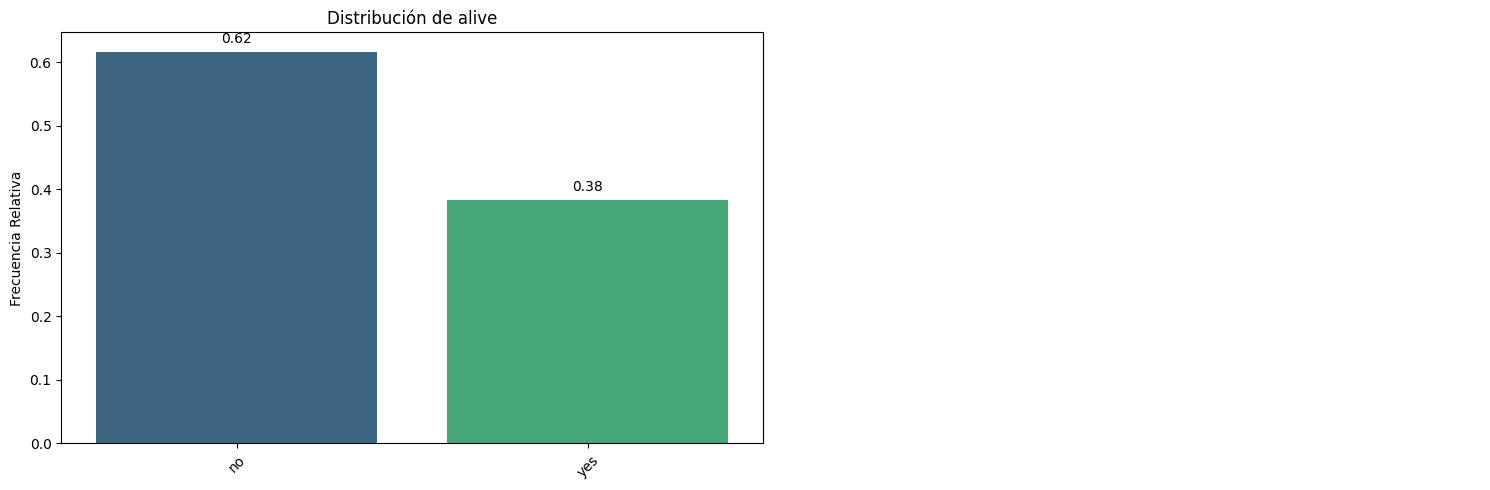

(2,)


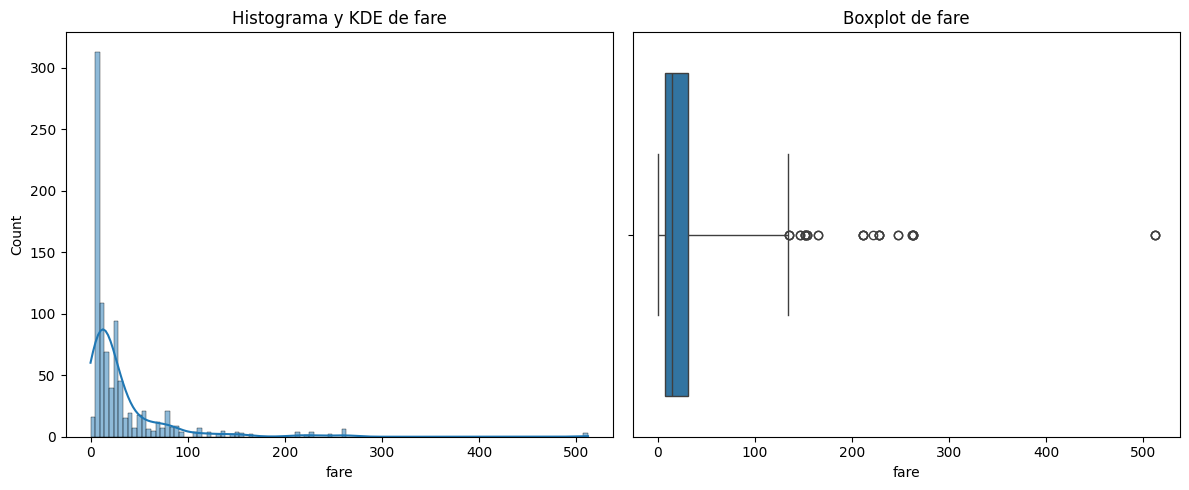

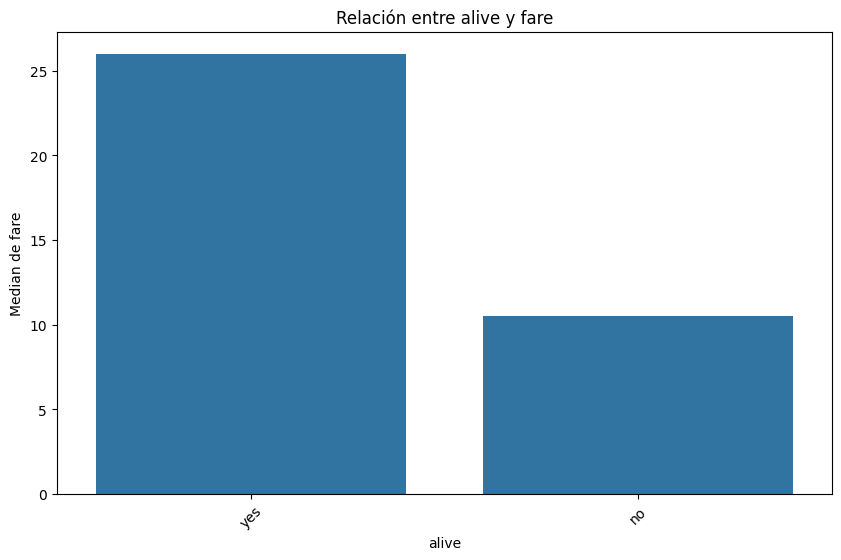

Aca se comienza a observar una alta tasa de supervivencia a medida que aumenta el precio del billete


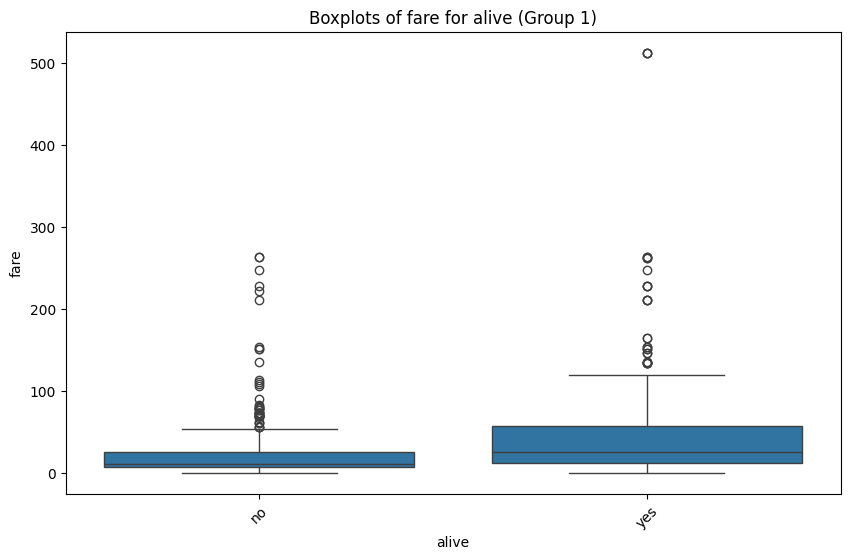

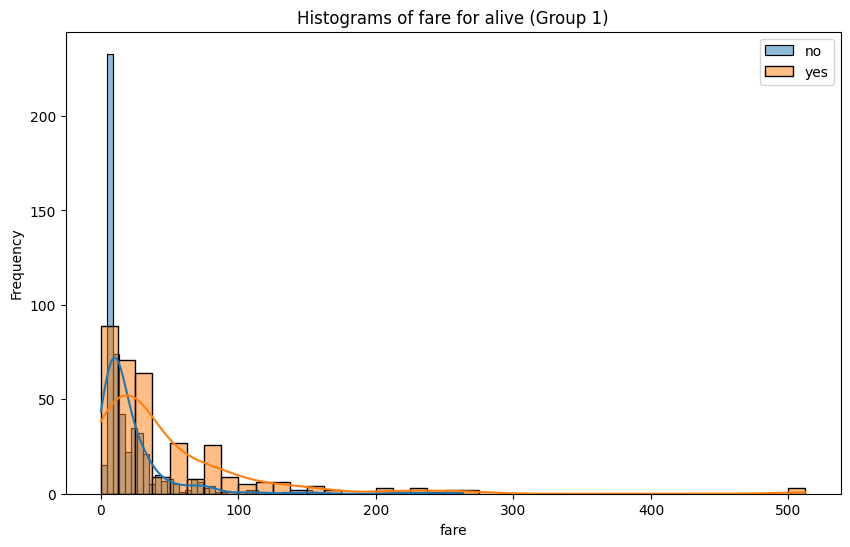

Parece que podría haber alguna relación entre el precio del billete y la supervivencia, aunque esto podría estar más vinculado a la clase       
y es probable que una tarifa más alta esté vinculada a una clase más alta.


In [19]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

pinta_distribucion_categoricas(df, ['alive'], relativa=True, mostrar_valores=True)

plot_combined_graphs(df,['fare'], whisker_width=4.5)

plot_categorical_numerical_relationship(df, 'alive', 'fare', measure = 'median')
print("Aca se comienza a observar una alta tasa de supervivencia a medida que aumenta el precio del billete")

plot_grouped_boxplots(df, 'alive', 'fare')

plot_grouped_histograms(df, 'alive', 'fare', group_size=2)

print("Parece que podría haber alguna relación entre el precio del billete y la supervivencia, aunque esto podría estar más vinculado a la clase \
      \ny es probable que una tarifa más alta esté vinculada a una clase más alta.")

In [20]:
# 5. ¿Existen pasajeros que no pagaron el billete?

print(f"La cantidad de pasajeron que entraron al Titanic sin pagar su billete por clase fueron: \n {df[df['fare'] == 0]['class'].value_counts()} \
      \n\nDando un total de {df[df['fare'] == 0]['class'].value_counts().sum()} pasajeros")

# Podrias explicar porque

print("\nEsto es posible que se deba a los miembros de la tripulacion, no estoy seguro si se realizó algun conteo de los polizones, para investigar.")

La cantidad de pasajeron que entraron al Titanic sin pagar su billete por clase fueron: 
 class
Second    6
First     5
Third     4
Name: count, dtype: int64       

Dando un total de 15 pasajeros

Esto es posible que se deba a los miembros de la tripulacion, no estoy seguro si se realizó algun conteo de los polizones, para investigar.


In [21]:
# ¿Qué ocurrió con la persona que más dinero se dejó?

df.loc[df['fare'] == df['fare'].max()]



,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


Habian 3 pasajeros con la misma cantidad de dinero en el Titanic, y los 3 sobrevivieron, uno era mujer y entre los 2 hombres, uno iba acompañado

In [22]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

print("Me cuesta mucho ver el analisis cuando es multivariable")

Me cuesta mucho ver el analisis cuando es multivariable


(2,)


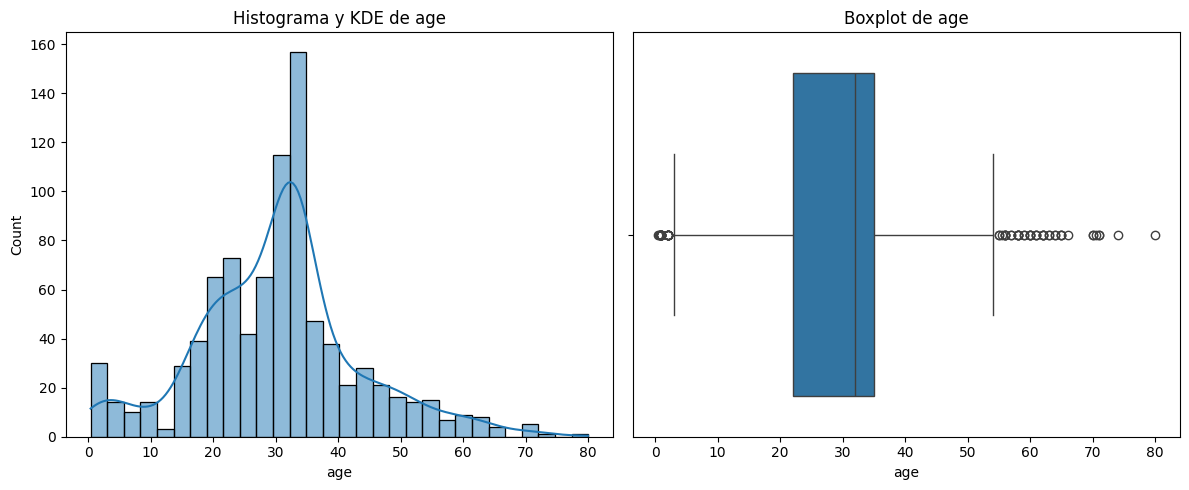

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [23]:
# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. 
# ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

plot_combined_graphs(df,["age"])
df["age"].describe()



In [24]:
bins = [0, 22, 32, 35, 80]
labels = ['niño/joven', 'adulto joven', 'adulto', 'adulto mayor']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [25]:
grouped_df = df.groupby(['class', 'age_group', 'alive']).size().unstack()
grouped_df['totals'] = grouped_df['no'] + grouped_df['yes']
grouped_df

# solo quiero acotar que me costo muchisimo tiempo llegar a esta solucion! Tuve que descubrir el metodo pd.cut() y el .size().unstack()
# Ya que aun no tengo muy claro la representacion grafica multivariante

C:\Users\rafae\AppData\Local\Temp\ipykernel_61040\158346322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['class', 'age_group', 'alive']).size().unstack()


alive                 no  yes  totals
class  age_group                     
First  niño/joven      6   23      29
       adulto joven   11   37      48
       adulto         17   18      35
       adulto mayor   46   58     104
Second niño/joven     12   29      41
       adulto joven   38   28      66
       adulto         16   11      27
       adulto mayor   31   19      50
Third  niño/joven    115   46     161
       adulto joven   98   56     154
       adulto        102   11     113
       adulto mayor   57    6      63

In [26]:
# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

print("Misma respuesta que los anteriores no tengo claro multivariante")

Misma respuesta que los anteriores no tengo claro multivariante


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

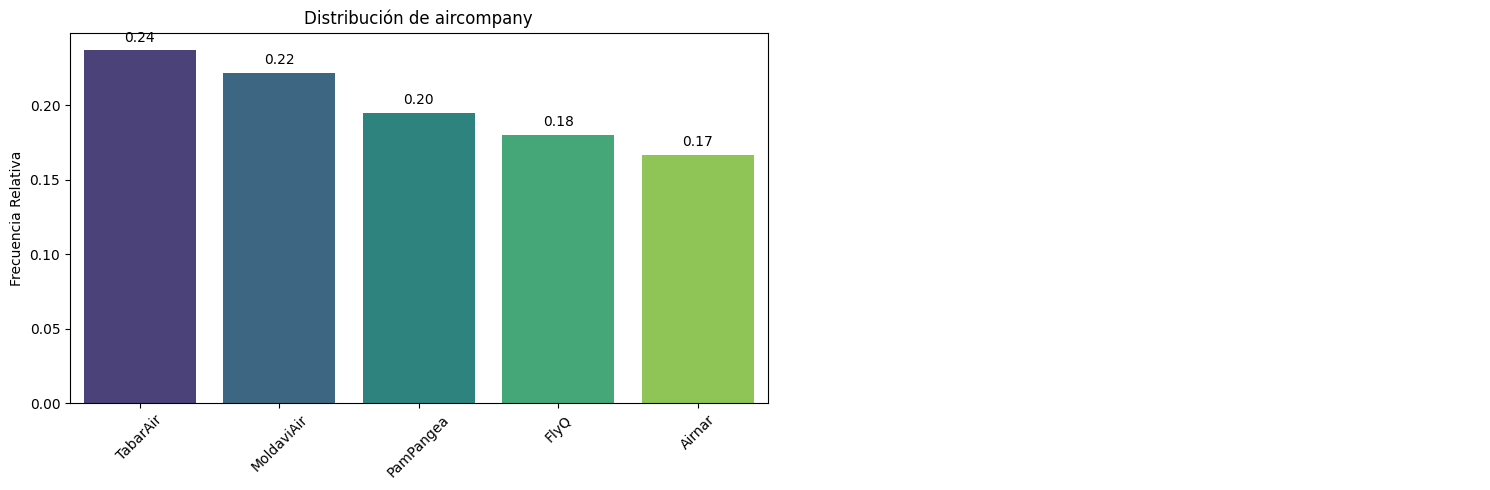

(2,)


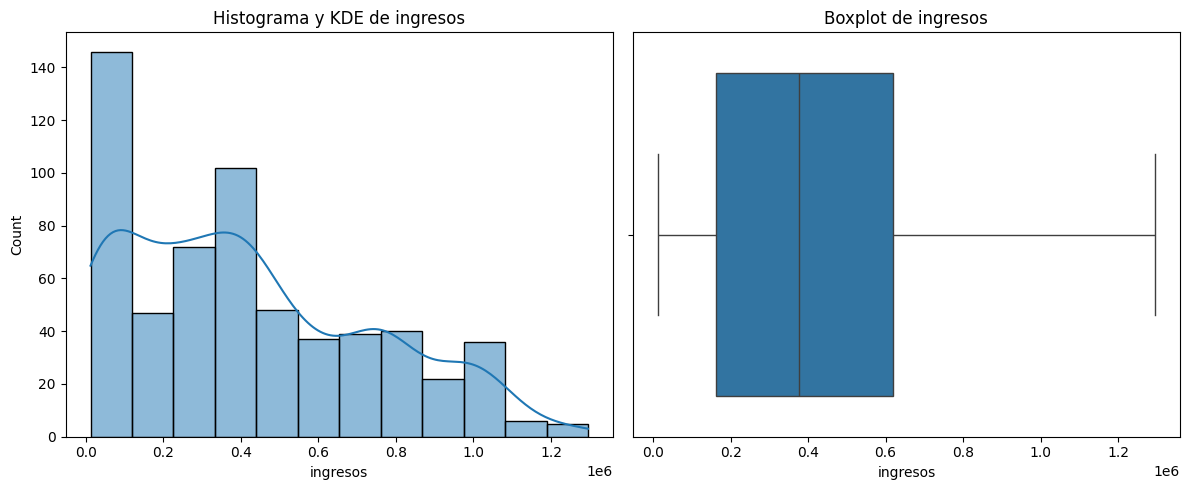

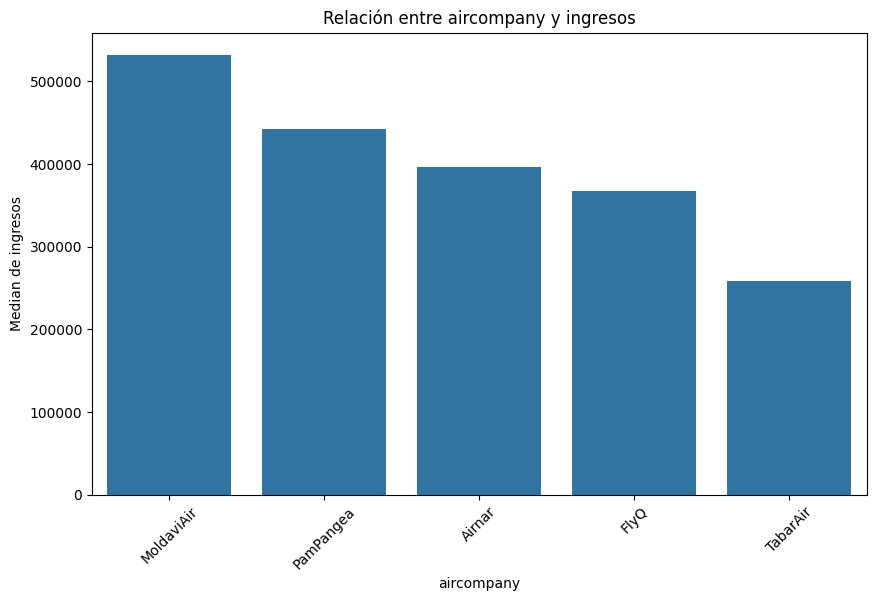

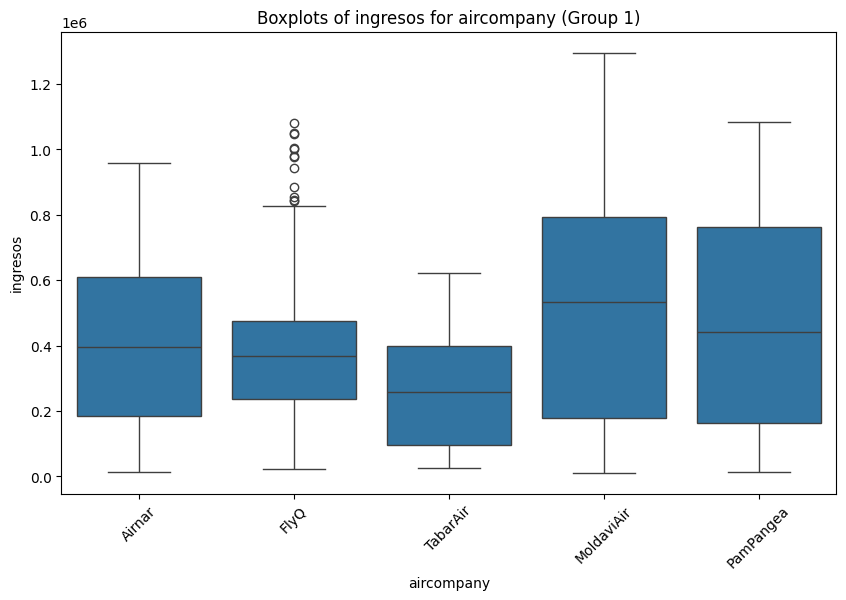

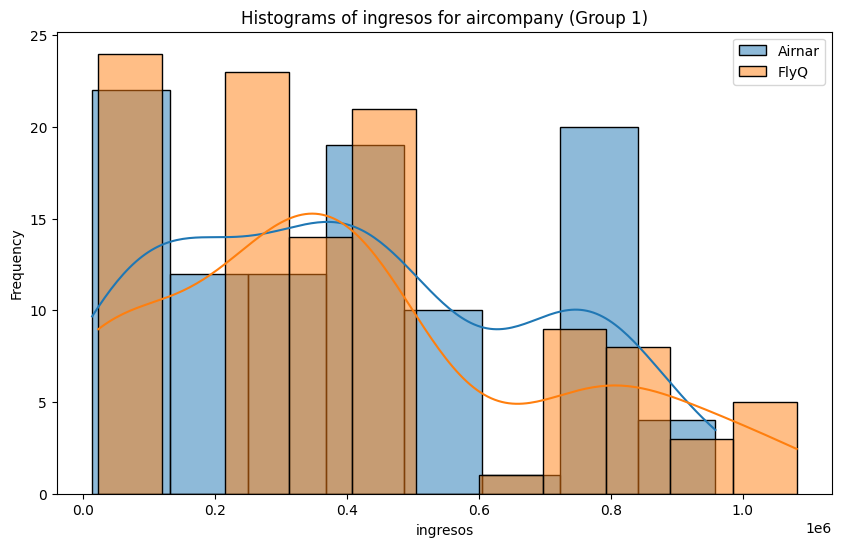

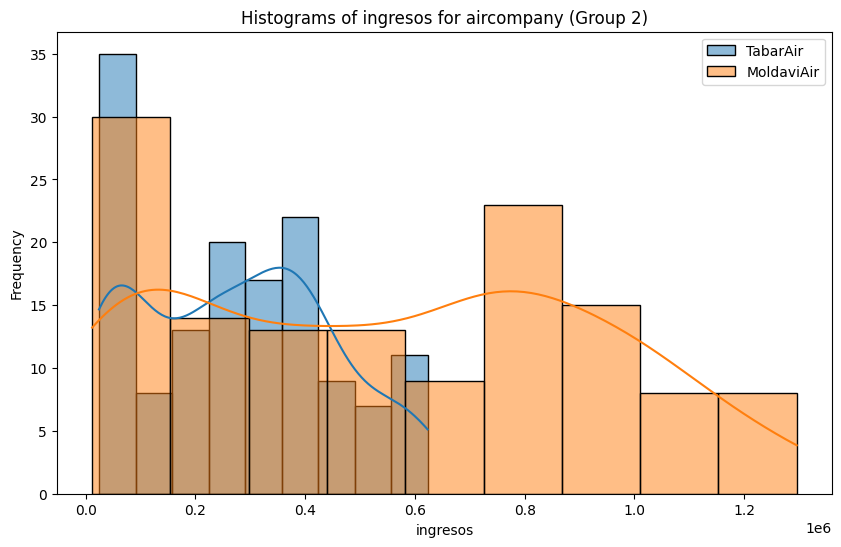

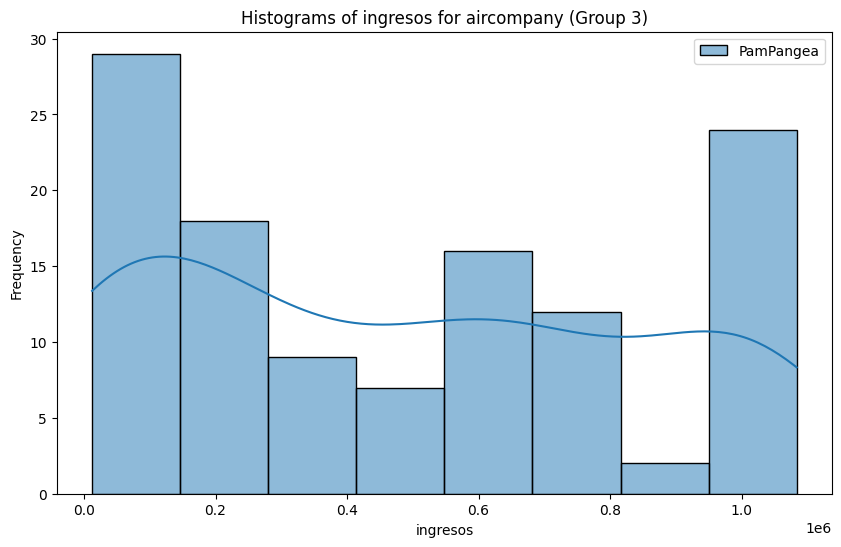

In [27]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

pinta_distribucion_categoricas(df_viajes, ['aircompany'], relativa=True, mostrar_valores=True)

plot_combined_graphs(df_viajes, ['ingresos'])

plot_categorical_numerical_relationship(df_viajes, 'aircompany', 'ingresos', measure='median')

plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

plot_grouped_histograms(df_viajes, 'aircompany', 'ingresos', 2)

In [28]:
df2 = df_viajes.groupby("aircompany").agg({"ingresos": sum, "destino": len})
df2


C:\Users\rafae\AppData\Local\Temp\ipykernel_61040\2791005964.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = df_viajes.groupby("aircompany").agg({"ingresos": sum, "destino": len})


,ingresos,destino
aircompany,,
Airnar,40529397.82,100
FlyQ,43374852.87,108
MoldaviAir,72894268.81,133
PamPangea,55974794.70,117
TabarAir,38487996.70,142


Menor rango de ingresos
- tiene mas vuelos pero:
* menos ingresos en mediana
* menor rango de ingresos con un pico en vuelos de pocos ingresos

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


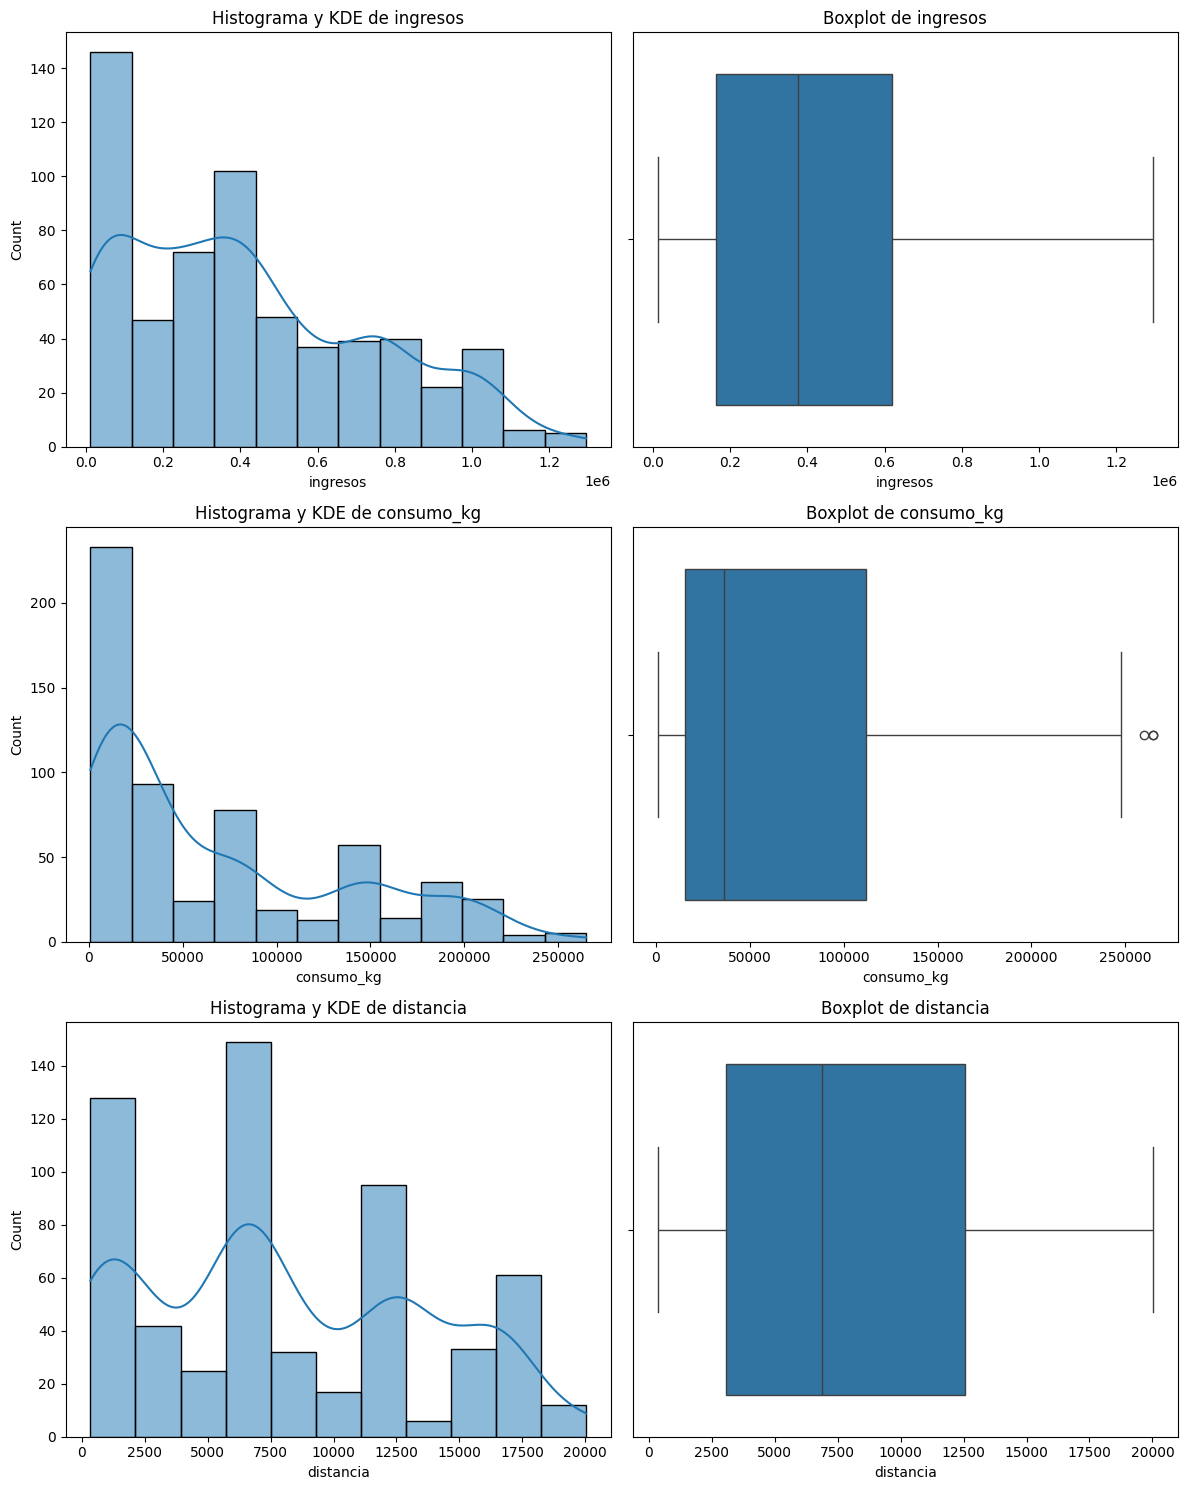

In [29]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

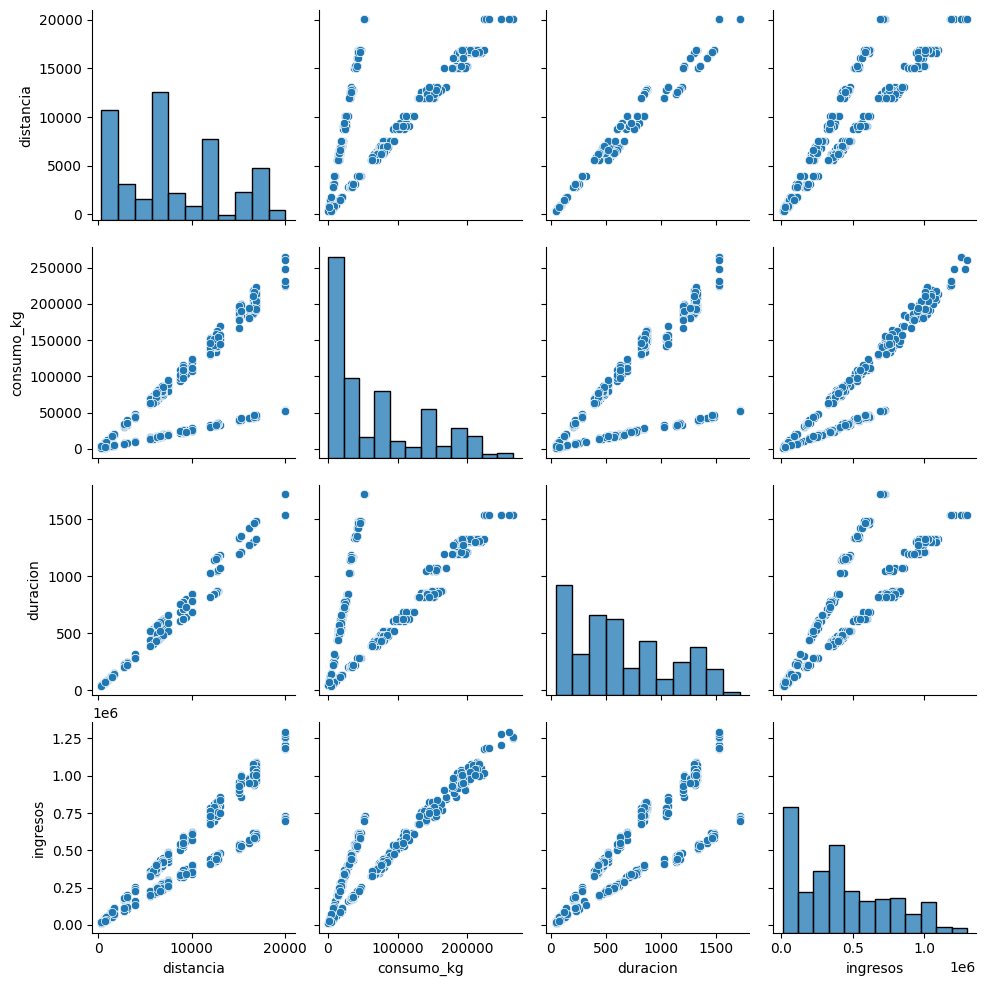

In [30]:
df_solo_numeros = df_viajes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns
sns.pairplot(df_solo_numeros)
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [31]:
df_viajes['distancia'].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [32]:
bins = [344, 3073, 6877, 12553, 20029]
labels = ['corto', 'Mediano','Largo','Extra Largo']
df_viajes["cat_vuelo"] = pd.cut(df_viajes['distancia'], bins=bins, labels=labels)

In [33]:
pd.crosstab(df_viajes["aircompany"],df_viajes["cat_vuelo"])

cat_vuelo,corto,Mediano,Largo,Extra Largo
aircompany,,,,
Airnar,31,12,40,17
FlyQ,24,34,22,28
MoldaviAir,25,19,25,55
PamPangea,27,23,19,42
TabarAir,48,43,51,0


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.